# Jawaban Latihan Studi Kasus

# Latihan Studi Kasus: Data Tips Restaurant

Sebuah dataset dari suatu Restaurant memuat variabel-variabel berikut:
*	total_bill: Total bill (cost of the meal), including tax, in US dollars
*	tip: Tip (gratuity) in US dollars
*	sex: Sex of person paying for the meal (0=male, 1=female)
*	smoker: Smoker in party? (0=No, 1=Yes)
*	day: 3=Thur, 4=Fri, 5=Sat, 6=Sun
*	time: 0=Day, 1=Night
*	size: Size of the party

https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset

In [49]:
# Loading Contoh Data studi kasus pertama di atas
tips = sns.load_dataset('tips') # Loading dari SeaBorn library's dataset

In [50]:
# Tipe Datanya : DataFrame (df)
type(tips)

pandas.core.frame.DataFrame

In [51]:
# Ukuran Data
N, P = tips.shape
print('baris = ', N, ', Kolom = ', P)

baris =  244 , Kolom =  7


In [52]:
# "Mengintip" beberapa data pertamanya
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [53]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


# Latihan:

## Silahkan berdiskusi (sekaligus membagi task: latihan TeamWork) untuk menjawab pertanyaan-pertanyaan berikut:

1. Adakah tipe variabel yang kurang tepat di data tersebut?
2. Apakah data numeriknya cenderung berdistribusi normal?
3. Apakah ada outlier, noise, missing values, dan-atau duplikasi data?
4. Apakah pelanggan pria dan wanita cenderung proporsional (balance)?
5. Dari data yang ada apakah Pria atau wanita ada kecenderungan memberi tips lebih besar?
6. Dari data yang ada apakah ada kecenderungan tips lebih besar di hari-hari tertentu?
7. Dari data yang ada apakah customer perokok cenderung memberi tips lebih besar?
8. Apakah pola di nomer 5 dan 7 dipengaruhi hari?
9. Pola apalagi yang dapat anda temukan? (misal, bisakah anda menyarankan tata letak kursi/meja restaurant dari data ini?)
9. Final question: dari hasil EDA anda saran apa saja yang akan anda berikan ke pemilik restaurant? 



* **Jawaban ada di bagian bawah modul ini, tapi usahakan menjawab tanpa melihat jawabannya**
* Skills/kompetensi apa yang terasa sangat diperlukan dari latihan ini?

In [55]:
# ini adalah parameter tambahan jika kita juga ingin mendapatkan statistik sederhana seluruh datanya
# (termasuk data kategorik)
tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


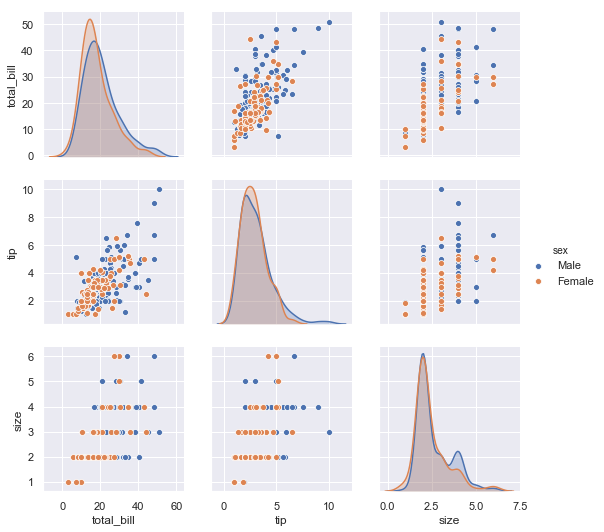

In [56]:
# Scatter Plots; https://seaborn.pydata.org/generated/seaborn.pairplot.html
p = sns.pairplot(tips, hue="sex")

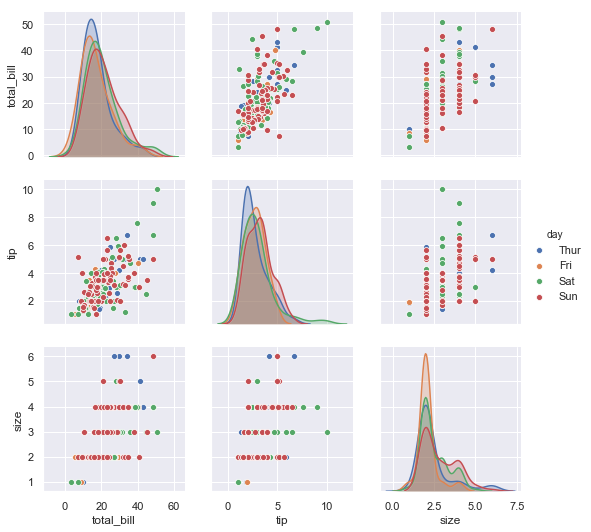

In [57]:
# Scatter Plots; https://seaborn.pydata.org/generated/seaborn.pairplot.html
p = sns.pairplot(tips, hue="day")

In [58]:
# Memilih hanya variable dengan tipe tertentu
tips_num = tips.select_dtypes(include = ['float64', 'int64'])
tips_num.head()
# Perhatikan tis_num adalah variable df baru! ... (hati-hati di data yang besar)

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [59]:
# Memilih hanya variable dengan tipe tertentu
tips_cat = tips.select_dtypes(include = ['category'])
tips_cat.head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


# Distribusi nilai pada setiap variabel kategorik

In [60]:
# get all unique values of a variable/column
for col in tips_cat.columns:
    print(col,': ', set(tips[col].unique()))

sex :  {'Female', 'Male'}
smoker :  {'No', 'Yes'}
day :  {'Thur', 'Fri', 'Sat', 'Sun'}
time :  {'Dinner', 'Lunch'}


In [61]:
# Tips
# Jika yang dibutuhkan memang hanya nama kolom, maka kita bisa melakukan hal ini untuk menghemat penggunaan memory
numVar = tips.select_dtypes(include = ['float64', 'int64']).columns
list(numVar)

['total_bill', 'tip', 'size']

In [62]:
# Distribusi tiap data
tips.smoker.value_counts()
# kita bisa juga visualisasikan informasi ini

No     151
Yes     93
Name: smoker, dtype: int64

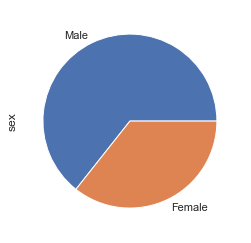

In [63]:
# PieChart
plot = tips.sex.value_counts().plot(kind='pie')

## Apakah ada kecenderungan hari dimana pengeluaran customer lebih besar?

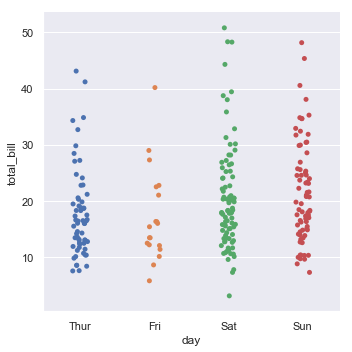

In [64]:
p= sns.catplot(x="day", y="total_bill", data=tips)

# Jika dilihat hari dan gender?

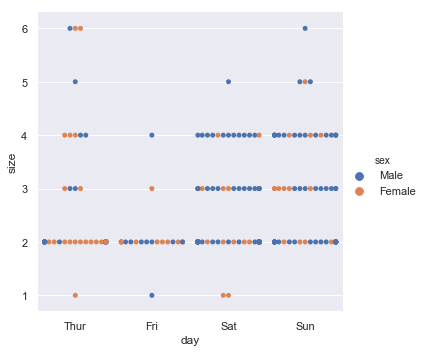

In [65]:
p= sns.catplot(x="day", y="size", hue="sex", kind="swarm", data=tips)

# Yang merokok cenderung memberi tips?

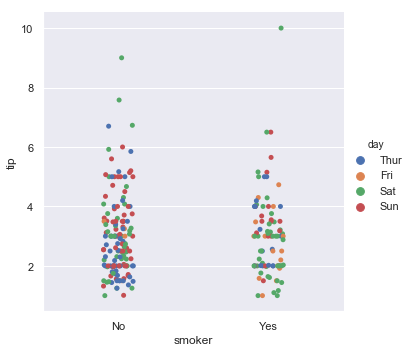

In [66]:
plot = sns.catplot(x="smoker", y="tip", order=["No", "Yes"], hue='day', data=tips)